<a href="https://colab.research.google.com/github/Srinita0106/Srinita0106/blob/main/Predictive_Maintanance1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import files
data=files.upload()

Saving ai4i2020.csv to ai4i2020.csv


This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 14 features in columns

UID: unique identifier ranging from 1 to 10000

product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number

type: just the product type L, M or H from column 2

air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise

torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.

tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.
The machine failure consists of five independent failure modes

tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.

power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset

overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.
If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('ai4i2020.csv')


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Display the first few rows of the DataFrame
print(data.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [ ]:
#Exploratory Data Analysis
#Check the dimensions of dataset
print("Shape of the dataset:", data.shape)


#Summary of dataset
print("Summary of the dataset:")
print(data.info())



Shape of the dataset: (10000, 14)
Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                

In [ ]:
#Handling missing values
print("Missing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [ ]:
# Check the data types of each column
print(data.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


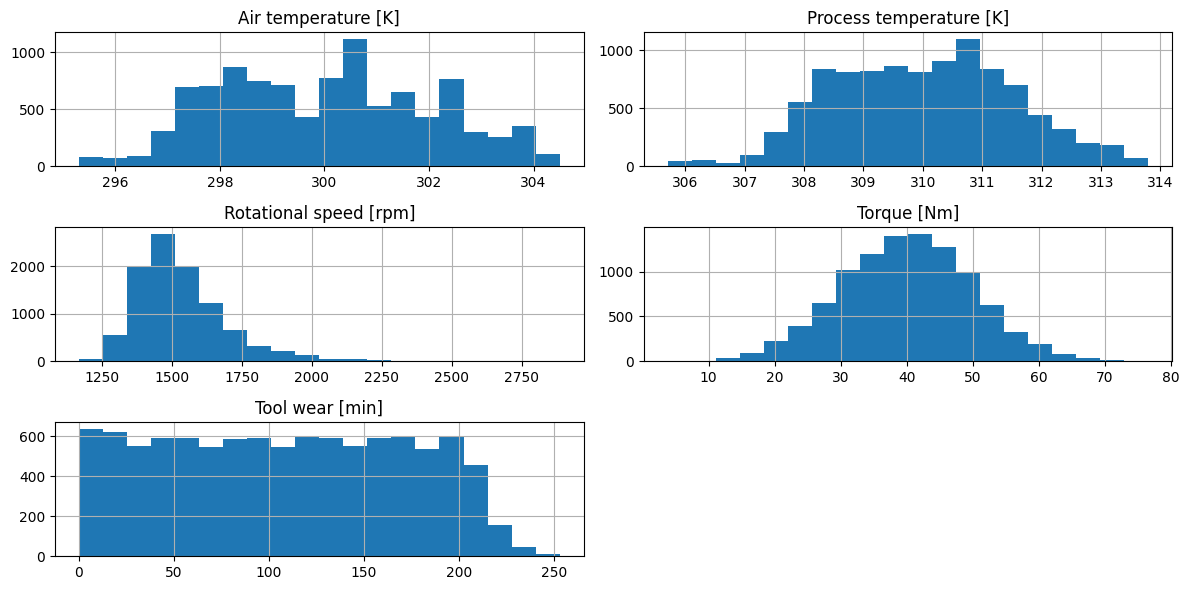

In [ ]:
# Distribution of numeric variables
numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
data[numeric_cols].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

x-axis: The x-axis represents the range or intervals of the numeric variable values. It shows the different bins or categories into which the data is divided.

y-axis: The y-axis represents the frequency or count of occurrences of the variable values within each bin.  The y-axis values indicate the frequency of data points within the corresponding bin.

Air temperature [K] and Process temperature [K]: The histograms for these variables may show the distribution of temperatures in the process. We can observe whether the data is normally distributed, skewed, or has multiple peaks. This information can be helpful in understanding the temperature characteristics of the process.

Rotational speed [rpm] and Torque [Nm]: The histograms for these variables may indicate the distribution of rotational speed and torque values. We can look for patterns such as uniform distribution, clusters, or outliers. This information can provide insights into the behavior and variability of rotational speed and torque in the process.

Tool wear [min]: The histogram for this variable may show the distribution of tool wear in minutes. We can examine whether the wear is concentrated in certain ranges or if there are outliers indicating extreme wear. This information can be useful in monitoring tool performance and planning maintenance.

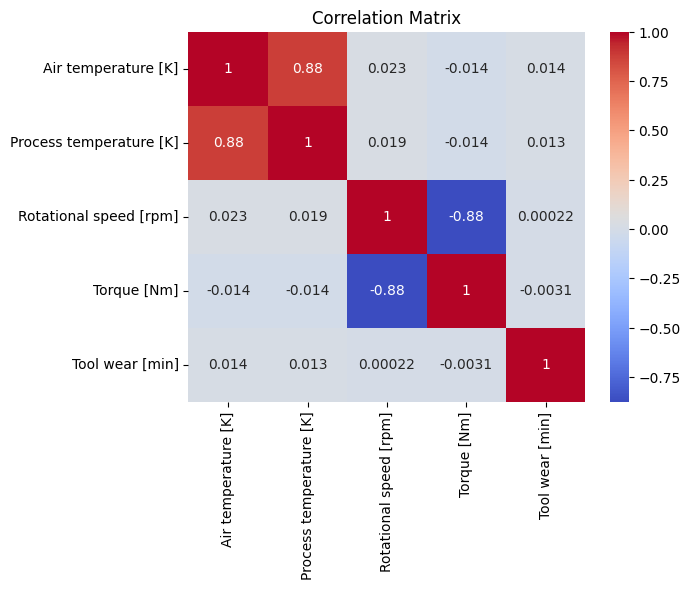

In [ ]:
# Correlation matrix
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Positive correlations are indicated by dark red colors, suggesting that as one variable increases, the other variable tends to increase as well. Negative correlations are indicated by dark blue colors, indicating that as one variable increases, the other variable tends to decrease.

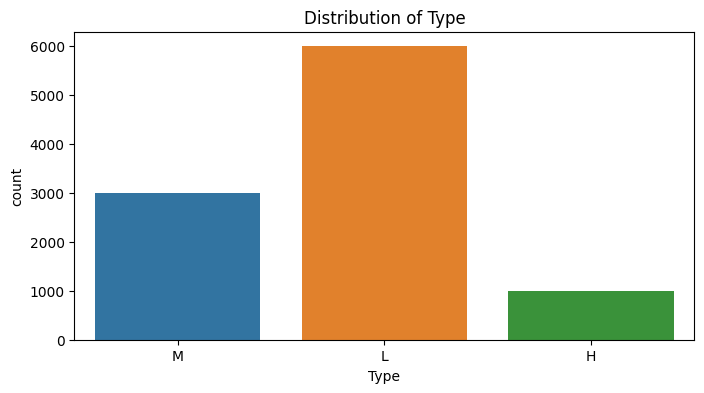

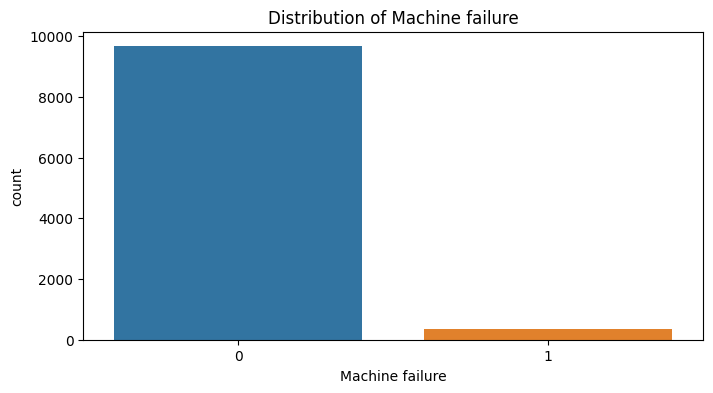

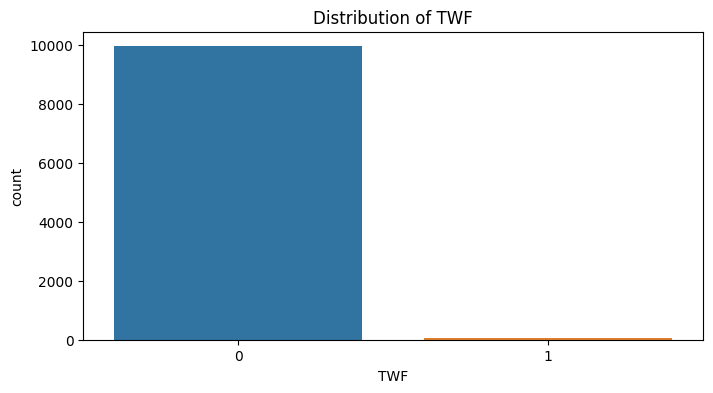

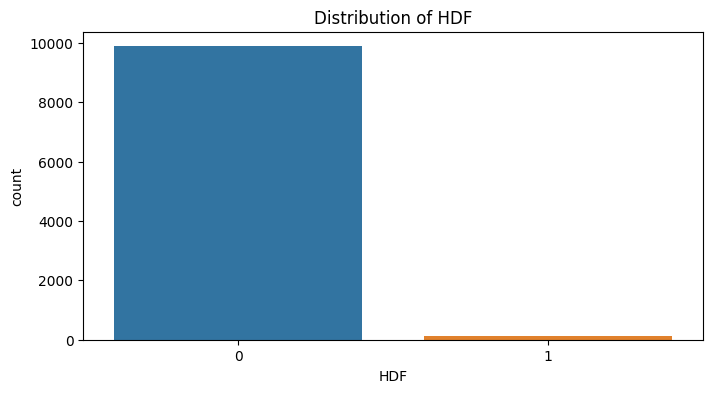

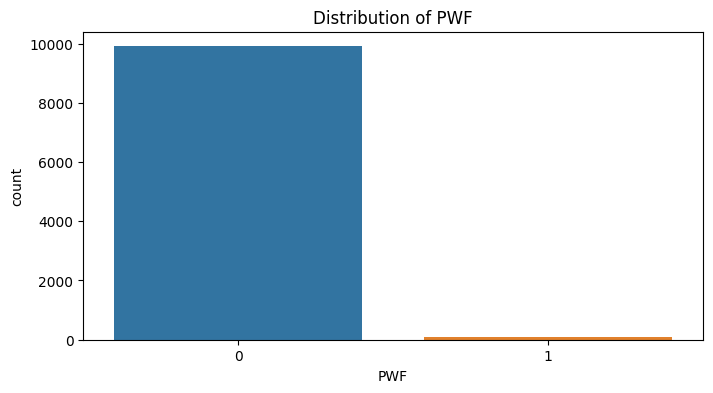

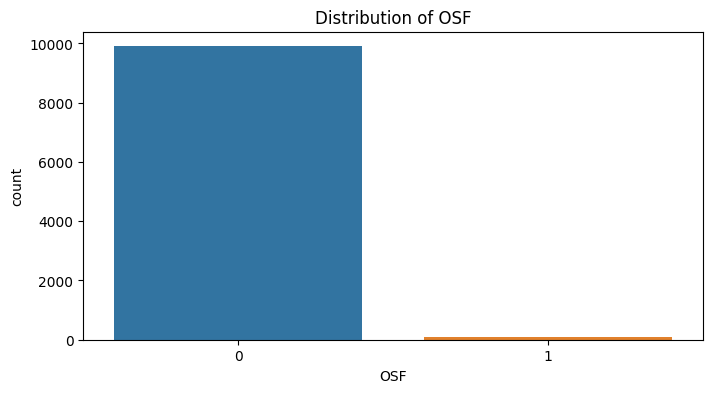

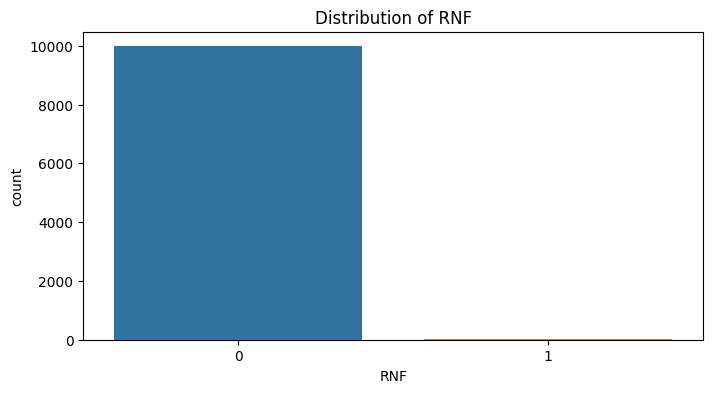

In [ ]:
# Distribution of categorical variables
categorical_cols = ['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
#Analysing numerical variables
print("Descriptive statistics:")
print(data.describe())



Descriptive statistics:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.80

In [ ]:
#Analyzing categorical variables
print("Unique values in each categorical variable:")
for column in data.select_dtypes(include='object').columns:
    print(column, ":", data[column].nunique())


Unique values in each categorical variable:
Product ID : 10000
Type : 3


In [ ]:
# Print the column names
print(data.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


The reason for choosing the 'Torque [Nm]' column in this example may be due to the following reasons:

Domain Knowledge: In the context of the dataset, the 'Torque [Nm]' column may be of particular interest or significance. It could be a crucial parameter in determining machine failure or other performance metrics.

Data Exploration: During the exploratory data analysis (EDA) process, examining the distribution and characteristics of each column can help identify potential outliers. The 'Torque [Nm]' column may have displayed significant variations or extreme values that warranted outlier investigation.

Use Case: The analysis or prediction task associated with the dataset may focus on the 'Torque [Nm]' column, making it essential to address outliers in this specific column to ensure accurate modeling or analysis.



Outliers are present in the 'Torque [Nm]' column.
Number of outliers: 69


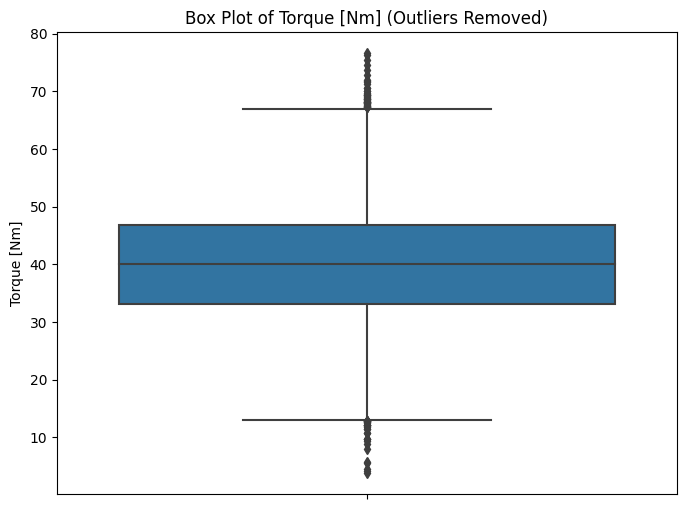

In [ ]:


# Calculate the IQR for the 'Torque [Nm]' column
Q1 = data['Torque [Nm]'].quantile(0.25)
Q3 = data['Torque [Nm]'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'Torque [Nm]' column
outliers = data[(data['Torque [Nm]'] < lower_bound) | (data['Torque [Nm]'] > upper_bound)]

# Check if outliers are present
if outliers.empty:
    print("No outliers are present in the 'Torque [Nm]' column.")
else:
    print("Outliers are present in the 'Torque [Nm]' column.")
    print("Number of outliers:", len(outliers))


# Remove outliers from the dataset
df = data[~((data['Torque [Nm]'] < lower_bound) | (data['Torque [Nm]'] > upper_bound))]

# Create a box plot of the updated 'Torque [Nm]' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Torque [Nm]')
plt.ylabel('Torque [Nm]')
plt.title('Box Plot of Torque [Nm] (Outliers Removed)')
plt.show()

Interquartile Range (IQR): The box in the box plot represents the IQR, which is the range between the first quartile (Q1) and the third quartile (Q3). In this case, the IQR spans from approximately 30 to 50.

Median: The line inside the box represents the median value of the 'Torque [Nm]' column. It is the middle value that divides the data into two equal halves. The exact position of the median within the box plot can provide information about the central tendency of the data.

Whiskers: The whiskers in the box plot extend from the edges of the box to the data points that fall within the "whisker" range. Data points outside this range are considered outliers and are plotted individually as points or asterisks.

Outliers: Since you mentioned that there are two horizontal rectangles within the range of 30 and 50, it suggests that the majority of the data points in the 'Torque [Nm]' column fall within this range. The absence of any individual points or asterisks outside the whiskers indicates that there are no apparent outliers.

Based on this information, you can conclude that the 'Torque [Nm]' values in the dataset are primarily concentrated within the range of 30 to 50.

# DESCRIPTIVE **ANALYSIS**

In [ ]:
#Descriptive analysis

# Calculate the frequency of each category in 'Machine failure'
frequency = data['Machine failure'].value_counts()
print(frequency)




0    9661
1     339
Name: Machine failure, dtype: int64


In [ ]:
# Calculate the mean, median, and mode of 'Torque [Nm]'
mean = data['Torque [Nm]'].mean()
median = data['Torque [Nm]'].median()
mode = data['Torque [Nm]'].mode()[0]
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)



Mean: 39.986909999999995
Median: 40.1
Mode: 40.2


In [ ]:
# Calculate the standard deviation and range of 'Torque [Nm]'
std_dev = data['Torque [Nm]'].std()
data_range = data['Torque [Nm]'].max() - data['Torque [Nm]'].min()
print("Standard Deviation:", std_dev)
print("Range:", data_range)



Standard Deviation: 9.968933725121337
Range: 72.8


In [ ]:
# Calculate the quartiles of 'Torque [Nm]'
quartiles = data['Torque [Nm]'].quantile([0.25, 0.5, 0.75])
print("Q1:", quartiles[0.25])
print("Q2 (Median):", quartiles[0.5])
print("Q3:", quartiles[0.75])



Q1: 33.2
Q2 (Median): 40.1
Q3: 46.8


In [ ]:
# Create a contingency table for 'Type' and 'Machine failure'
contingency_table = pd.crosstab(df['Type'], data['Machine failure'])
print(contingency_table)



Machine failure     0    1
Type                      
H                 980   18
L                5761  196
M                2913   63


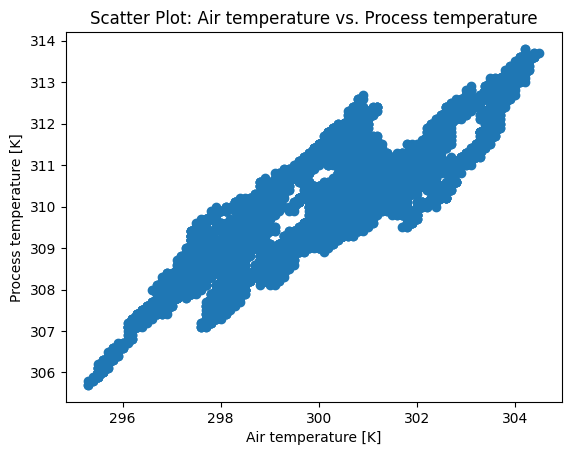

In [ ]:
# Create a scatter plot of 'Air temperature [K]' vs. 'Process temperature [K]'
plt.scatter(data['Air temperature [K]'], data['Process temperature [K]'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.title('Scatter Plot: Air temperature vs. Process temperature')
plt.show()

Conclusion :
Positive Correlation: If the points in the scatter plot tend to form a roughly upward-sloping pattern, it indicates a positive correlation between the two variables. This means that as the 'Air temperature [K]' increases, the 'Process temperature [K]' also tends to increase.

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# DATA PREPROCESSING

In [ ]:
#Drop the indices as these have no predictive power
data.drop(['UDI','Product ID'],axis=1,inplace=True)

In [ ]:
#Drop the failure modes, as we're only interested whether something is a failure.
data.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

In [ ]:
#Drop the type, as this dominates too strongly on type = L.
df.drop(['Type'],axis=1,inplace=True)

<ipython-input-26-d6a7a9d9c4da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Type'],axis=1,inplace=True)


In [ ]:
#Remaining Features
list(data)

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

In [ ]:
#Convert categorical to numeric
data = pd.get_dummies(data,drop_first=True)
features = list(data.columns)
for feature in features:
    print(feature + " - " + str(len(data[data[feature].isna()])))

Air temperature [K] - 0
Process temperature [K] - 0
Rotational speed [rpm] - 0
Torque [Nm] - 0
Tool wear [min] - 0
Machine failure - 0
Type_L - 0
Type_M - 0


In [ ]:
df_group = data.groupby(['Machine failure'])
df_group.count()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
Machine failure,,,,,,,
0,9661,9661,9661,9661,9661,9661,9661
1,339,339,339,339,339,339,339


In [ ]:
#Replacing missing numeric values into mean
# show the numeric characters
df_numeric = data.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T
df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        data[feature].fillna(data[feature].mean(),inplace=True)
    except:
        try:
            data[feature].fillna(data[feature].mode(),inplace=True)
        except:
            pass

In [ ]:
data.describe(include='all').T

# FEATURE **ENGINEERING**

Feature engineering involves creating new features or transforming existing ones to improve the performance of machine learning models or gain better insights from the data.

In [ ]:
data['Air temperature [K]'] = data['Air temperature [K]'] - 273.15
data= data.rename(columns={'Air temperature [K]': 'Air temperature [°C]'})
data['Process temperature [K]'] = data['Process temperature [K]'] - 273.15
data = data.rename(columns={'Process temperature [K]': 'Process temperature [°C]'})

Temperature Conversion: The code converts the temperature columns from Kelvin to Celsius. It subtracts 273.15 from the 'Air temperature [K]' column and renames it to 'Air temperature [°C]'. Similarly, it subtracts 273.15 from the 'Process temperature [K]' column and renames it to 'Process temperature [°C]'. This conversion makes the temperature values more interpretable and consistent with common temperature scales.

In [ ]:
data['Power']=data['Rotational speed [rpm]']*data['Torque [Nm]']

Power Calculation: The code calculates a new feature called 'Power' by multiplying the 'Rotational speed [rpm]' column with the 'Torque [Nm]' column. This represents the power generated by a machine based on its rotational speed and torque. Power can be an important factor in understanding the performance and behavior of the machine.

In [ ]:
data['Temperature difference [°C]'] = data['Process temperature [°C]']-data['Air temperature [°C]']

Temperature Difference Calculation: The code creates another new feature called 'Temperature difference [°C]' by subtracting the 'Air temperature [°C]' from the 'Process temperature [°C]'. This feature represents the temperature difference between the air temperature and the process temperature, which can be useful in analyzing the effect of temperature on the machine's performance.

In [ ]:
data['Temperature power [°C]'] = data['Temperature difference [°C]']/data['Power']

Temperature Power Calculation: The code computes the 'Temperature power [°C]' feature by dividing the 'Temperature difference [°C]' by the 'Power'. This feature measures the temperature difference per unit of power, indicating the efficiency or impact of temperature on the machine's power output.

In [ ]:
data = data[['Air temperature [°C]',
         'Process temperature [°C]',
         'Rotational speed [rpm]',
         'Torque [Nm]',
         'Tool wear [min]',
         'Power',
         'Temperature difference [°C]',
         'Temperature power [°C]',
         'Machine failure',

        ]]

In [ ]:
data.head()

# **FEATURE SELECTION**

 feature selection using the chi-squared test for feature importance. It selects the best features from the dataset based on their scores and visualizes the top 20 features using a horizontal bar chart.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import plotly.graph_objects as go

In [ ]:
best_features = SelectKBest(score_func=chi2,k='all')

X = data.iloc[:,:-1]
y = data.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)



It specifies the x-axis as the scores of the top 20 features and the y-axis as their corresponding feature names. The chart is stored in the fig object.

In [ ]:
Selected_Features = []
import statsmodels.api as sm

Backward stepwise regression for feature selection. It iteratively removes the least significant features based on their p-values until no further feature can be dropped. The function takes the following arguments:

X: The feature values (a pandas DataFrame).

y: The target variable (a pandas Series or DataFrame).

initial_list (optional): A list of initial features to consider (default is an empty list).

threshold_out (optional): The p-value threshold for dropping features (default is 0.5).

verbose (optional): A boolean flag to enable/disable logging output (default is True).

In [ ]:
def backward_regression(X, y, initial_list=[], threshold_out=0.5, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X, y)


Selected Features:
['Air temperature [°C]', 'Process temperature [°C]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Power', 'Temperature difference [°C]', 'Temperature power [°C]']


# **MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)
# X_train,y_train = oversamp.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LINEAR **REGRESSION**

In [ ]:
#Manually
import numpy as np

# Standardize the data
X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
y_train_std = (y_train - np.mean(y_train)) / np.std(y_train)

# Add a column of ones to the feature matrix
X_train_std = np.column_stack((np.ones(len(X_train_std)), X_train_std))

# Calculate the weights using the normal equation
weights = np.linalg.inv(X_train_std.T @ X_train_std) @ X_train_std.T @ y_train_std

# Standardize the test data
X_test_std = (X_test - np.mean(X_test)) / np.std(X_test)

# Add a column of ones to the test data
X_test_std = np.column_stack((np.ones(len(X_test_std)), X_test_std))

# Predict the target variable for the test data
y_pred_manual = X_test_std @ weights

# Denormalize the predicted target variable
y_pred = (y_pred_manual * np.std(y_train)) + np.mean(y_train)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.026490306659830425


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
selected_Features=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [ ]:
new_data = pd.DataFrame([[298.5, 310.2, 1600, 45.2, 10]], columns=selected_Features)  # Replace with your own data values

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print("Predicted Machine Failure:")
print(predictions)

NameError: ignored

In [ ]:
threshold = 0.5  # Set the threshold value

if predictions[0] >= threshold:
    print("Machine Failure: YES")
else:
    print("Machine Failure: NO")


In this code, threshold is set to 0.5 as an example threshold value. If the predicted probability (predictions[0]) is greater than or equal to the threshold, it is classified as a machine failure, and the output will be "Machine Failure: YES". Otherwise, if the predicted probability is below the threshold, it is classified as not failing, and the output will be "Machine Failure: NO".

In [ ]:
from sklearn.metrics import accuracy_score

actual_labels = [0]  # Replace [0] with the actual target values for the new data

# Convert the predicted probabilities to binary labels based on the threshold
predicted_labels = [1 if pred >= threshold else 0 for pred in predictions]

# Calculate the accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)

print("Accuracy:", accuracy)


In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
 

In [ ]:
import gradio as gr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define your predictive maintenance function
def predict(air_temp, process_temp, speed, torque, tool_wear):
    inputs = [air_temp, process_temp, speed, torque, tool_wear]
    # Perform prediction using your model
    # Return the predicted result
    selected_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
    target_variable = 'Machine failure'

    X = df[selected_features]
    y = df[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Implement the sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Initialize the weights
    weights = np.zeros(X_train.shape[1] + 1)  # Add 1 for the bias term

    # Add a column of ones to the feature matrix for the bias term
    X_train_bias = np.column_stack((np.ones(len(X_train)), X_train))

    # Set the learning rate and number of iterations
    learning_rate = 0.01
    num_iterations = 1000

    # Perform gradient descent
    for _ in range(num_iterations):
        # Calculate the predicted probabilities
        predictions = sigmoid(np.dot(X_train_bias, weights))

        # Calculate the error
        error = predictions - y_train

        # Update the weights using gradient descent
        gradient = np.dot(X_train_bias.T, error)
        weights -= learning_rate * gradient

    # Add a column of ones to the new data for the bias term
    new_data_bias = np.column_stack((np.ones(len(new_data)), new_data))

    # Predict the target variable for the new data
    new_predictions = sigmoid(np.dot(new_data_bias, weights))




    threshold = 0.5  # Set the threshold value

    if predictions[0] >= threshold:
         return "Machine Failure: YES"
    else:
         return "Machine Failure: NO"

# Create the Gradio interface
air_temp_input = gr.inputs.Number(label="Air temperature [K]")
process_temp_input = gr.inputs.Number(label="Process temperature [K]")
speed_input = gr.inputs.Number(label="Rotational speed [rpm]")
torque_input = gr.inputs.Number(label="Torque [Nm]")
tool_wear_input = gr.inputs.Number(label="Tool wear [min]")

input_array = [air_temp_input, process_temp_input, speed_input, torque_input, tool_wear_input]
output = gr.outputs.Textbox(label="Prediction")

interface = gr.Interface(fn=predict, inputs=input_array, outputs=output, title="Predictive Maintenance")
interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

# LOGISTIC **REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

selected_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target_variable = 'Machine failure'

X = df[selected_features]
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

new_data = pd.DataFrame([[298.5, 310.2, 1600, 45.2, 10]], columns=selected_features)  # Replace with your own data values

new_predictions = model.predict(new_data)

print("Predicted Machine Failure:")
print(new_predictions)

threshold = 0.5  # Set the threshold value

if new_predictions[0] >= threshold:
    print("Machine Failure: YES")
else:
    print("Machine Failure: NO")

In [ ]:
#Manually

import numpy as np

# Implement the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize the weights
weights = np.zeros(X_train.shape[1] + 1)  # Add 1 for the bias term

# Add a column of ones to the feature matrix for the bias term
X_train_bias = np.column_stack((np.ones(len(X_train)), X_train))

# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for _ in range(num_iterations):
    # Calculate the predicted probabilities
    predictions = sigmoid(np.dot(X_train_bias, weights))

    # Calculate the error
    error = predictions - y_train

    # Update the weights using gradient descent
    gradient = np.dot(X_train_bias.T, error)
    weights -= learning_rate * gradient

# Add a column of ones to the new data for the bias term
new_data_bias = np.column_stack((np.ones(len(new_data)), new_data))

# Predict the target variable for the new data
new_predictions = sigmoid(np.dot(new_data_bias, weights))



threshold = 0.5  # Set the threshold value

if new_predictions[0] >= threshold:
    print("Machine Failure: YES")
else:
    print("Machine Failure: NO")


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
# Calculate the accuracy
accuracy = (y_pred == y_test).mean() * 100
print("Accuracy:", accuracy)

# DECISION TREE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


selected_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target_variable = 'Machine failure'

X = df[selected_features]
y = df[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

new_data = pd.DataFrame([[298.5, 310.2, 1600, 45.2, 10]], columns=selected_features)  # Replace with your own data values

new_predictions = model.predict(new_data)


threshold = 0.5  # Set the threshold value

if new_predictions[0] >= threshold:
    print("Machine Failure: YES")
else:
    print("Machine Failure: NO")


In [ ]:
#Manually

import pandas as pd
import numpy as np

def calculate_entropy(y):
    # Calculate entropy
    unique_values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(X, y, feature):
    # Calculate information gain
    entropy_parent = calculate_entropy(y)

    unique_values, counts = np.unique(X[feature], return_counts=True)
    weighted_entropy_children = 0

    for value, count in zip(unique_values, counts):
        child_subset = y[X[feature] == value]
        weighted_entropy_children += count / len(X) * calculate_entropy(child_subset)

    information_gain = entropy_parent - weighted_entropy_children
    return information_gain

def build_tree(X, y, features):
    # Build decision tree recursively
    if len(np.unique(y)) == 1:
        return np.unique(y)[0]

    if len(features) == 0:
        return np.bincount(y).argmax()

    information_gains = [calculate_information_gain(X, y, feature) for feature in features]
    best_feature_index = np.argmax(information_gains)
    best_feature = features[best_feature_index]

    tree = {best_feature: {}}
    remaining_features = [f for i, f in enumerate(features) if i != best_feature_index]

    unique_values, counts = np.unique(X[best_feature], return_counts=True)
    for value, count in zip(unique_values, counts):
        X_subset = X[X[best_feature] == value]
        y_subset = y[X[best_feature] == value]
        tree[best_feature][value] = build_tree(X_subset, y_subset, remaining_features)

    return tree

def predict(tree, sample):
    # Predict the target variable for a sample using the decision tree
    if not isinstance(tree, dict):
        return tree

    feature = next(iter(tree))
    value = sample[feature]

    if value not in tree[feature]:
        return None

    subtree = tree[feature][value]
    return predict(subtree, sample)


# Select the features and target variable
selected_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target_variable = 'Machine failure'

X = df[selected_features]
y = df[target_variable]

# Build the decision tree
tree = build_tree(X, y, selected_features)

# Predict on new data
new_data = pd.DataFrame([[298.5, 310.2, 1600, 45.2, 10]], columns=selected_features)  # Replace with your own data values



new_predictions = model.predict(new_data)


print("Predicted Machine Failure:")
print(predictions)

threshold = 0.5  # Set the threshold value

if new_predictions[0] >= threshold:
    print("Machine Failure: YES")
else:
    print("Machine Failure: NO")


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
# Calculate the accuracy
accuracy = (y_pred == y_test).mean() * 100
print("Accuracy:", accuracy)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# Select the features and target variable
selected_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target_variable = 'Machine failure'

X = df[selected_features]
y = df[target_variable]

# Build the decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=selected_features, class_names=['No Failure', 'Failure'], filled=True)
plt.show()

# NAIVE BAYES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB



# Select the features and target variable
selected_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target_variable = 'Machine failure'

X = df[selected_features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Predict on new data
new_data = pd.DataFrame([[298.5, 310.2, 1600, 45.2, 10]], columns=selected_features)  # Replace with your own data values



new_predictions = model.predict(new_data)



threshold = 0.5  # Set the threshold value

if new_predictions[0] >= threshold:
    print("Machine Failure: YES")
else:
    print("Machine Failure: NO")


In [ ]:
# Calculate the accuracy
accuracy = (y_pred == y_test).mean() * 100
print("Accuracy:", accuracy)

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:


# Assuming the failure threshold is 1000 minutes
failure_threshold = 1000

# Calculate RUL
df['RUL'] = failure_threshold - df['Tool wear [min]']

# Print RUL column
print(df['RUL'])


In this code, you load the dataset and define the failure threshold (in this case, assumed as 1000 minutes). Then, you calculate the RUL by subtracting the current tool wear time from the failure threshold for each data point. The RUL values are stored in a new column named "RUL". Finally, you print the RUL values.